# Загрузка данных

In [1]:
pip install --upgrade 'sqlalchemy<2.0' 

     |████████████████████████████████| 1.6 MB 2.5 MB/s eta 0:00:01
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.20
    Uninstalling SQLAlchemy-1.4.20:
      Successfully uninstalled SQLAlchemy-1.4.20
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

     |████████████████████████████████| 572 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install psycopg2-binary 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install phik

     |████████████████████████████████| 679 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import torch
import torch.nn as nn


from sqlalchemy import create_engine 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

import catboost
from catboost import cv
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix

from sklearn. metrics import precision_recall_curve

import shap
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore")

In [7]:
RANDOM_STATE = 10523

In [8]:
db_config = {
'user': 'praktikum_student','pwd': 'Sdf4$2;d-d30pp','host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,'db': 'data-science-final'}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [9]:
engine = create_engine(connection_string) 

In [10]:
query = '''
SELECT *
FROM telecom.contract
'''
contract_df = pd.read_sql_query(query, con=engine) 

query = '''
SELECT *
FROM telecom.personal
'''
personal_df = pd.read_sql_query(query, con=engine) 

query = '''
SELECT *
FROM telecom.internet
'''
internet_df = pd.read_sql_query(query, con=engine) 

query = '''
SELECT *
FROM telecom.phone
'''
phone_df = pd.read_sql_query(query, con=engine) 

internet_df = internet_df.rename(columns=internet_df.iloc[0]).drop(internet_df.index[0])
phone_df = phone_df.rename(columns=phone_df.iloc[0]).drop(phone_df.index[0])

In [11]:
for i in [contract_df,personal_df,internet_df,phone_df]:
  print('--------------------------------------------------')
  display(i.head())
  display(i.info())
  display(i.describe())

--------------------------------------------------


customerID   BeginDate     EndDate            Type PaperlessBilling  \
0  4472-LVYGI  2020-02-01        None        Two year              Yes   
1  3115-CZMZD  2020-02-01        None        Two year               No   
2  3668-QPYBK  2018-08-09  2019-12-01  Month-to-month              Yes   
3  5709-LVOEQ  2020-02-01        None        Two year               No   
4  9237-HQITU  2019-01-26  2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  
0  Bank transfer (automatic)           52.55           NaN  
1               Mailed check           20.25           NaN  
2               Mailed check           53.85        108.15  
3               Mailed check           80.85           NaN  
4           Electronic check           70.70        151.65

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


None

MonthlyCharges  TotalCharges
count     7043.000000   7032.000000
mean        64.761692   2283.300441
std         30.090047   2266.771362
min         18.250000     18.800000
25%         35.500000    401.450000
50%         70.350000   1397.475000
75%         89.850000   3794.737500
max        118.750000   8684.800000

--------------------------------------------------


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

--------------------------------------------------


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
1  7590-VHVEG             DSL             No          Yes               No   
2  5575-GNVDE             DSL            Yes           No              Yes   
3  3668-QPYBK             DSL            Yes          Yes               No   
4  7795-CFOCW             DSL            Yes           No              Yes   
5  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
1          No          No              No  
2          No          No              No  
3          No          No              No  
4         Yes          No              No  
5          No          No              No

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 1 to 5517
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 387.9+ KB


None

customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     6797-UCJHZ     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785

--------------------------------------------------


customerID MultipleLines
1  5575-GNVDE            No
2  3668-QPYBK            No
3  9237-HQITU            No
4  9305-CDSKC           Yes
5  1452-KIOVK           Yes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 1 to 6361
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 149.1+ KB


None

customerID MultipleLines
count         6361          6361
unique        6361             2
top     6797-UCJHZ            No
freq             1          3390

Исходя из первичного осмотра данных мы можем видеть, что все таблицы присутствуют со всеми столбцами из документации. При этом в третьей и четвертой таблице во всех столбцах есть пропуски, в то время как в первых двух таблицах пропуск есть только в одном столбце.

In [12]:
#Объединим все датафремы

df = contract_df.merge(personal_df,how='left',on='customerID')
df = df.merge(internet_df,how='left',on='customerID')
df = df.merge(phone_df,how='left',on='customerID')

In [13]:
df.head(5)

customerID   BeginDate     EndDate            Type PaperlessBilling  \
0  4472-LVYGI  2020-02-01        None        Two year              Yes   
1  3115-CZMZD  2020-02-01        None        Two year               No   
2  3668-QPYBK  2018-08-09  2019-12-01  Month-to-month              Yes   
3  5709-LVOEQ  2020-02-01        None        Two year               No   
4  9237-HQITU  2019-01-26  2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0  Bank transfer (automatic)           52.55           NaN  Female   
1               Mailed check           20.25           NaN    Male   
2               Mailed check           53.85        108.15    Male   
3               Mailed check           80.85           NaN  Female   
4           Electronic check           70.70        151.65  Female   

   SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0              0     Yes        Yes             DSL            Yes   
1              0      No        Yes             NaN            NaN   
2              0      No         No             DSL            Yes   
3              0     Yes        Yes             DSL            Yes   
4              0      No         No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0           No              Yes         Yes         Yes              No   
1          NaN              NaN         NaN         NaN             NaN   
2          Yes               No          No          No              No   
3          Yes              Yes          No         Yes             Yes   
4           No               No          No          No              No   

  MultipleLines  
0           NaN  
1            No  
2            No  
3            No  
4            No

In [14]:
df.describe()

MonthlyCharges  TotalCharges  SeniorCitizen
count     7043.000000   7032.000000    7043.000000
mean        64.761692   2283.300441       0.162147
std         30.090047   2266.771362       0.368612
min         18.250000     18.800000       0.000000
25%         35.500000    401.450000       0.000000
50%         70.350000   1397.475000       0.000000
75%         89.850000   3794.737500       0.000000
max        118.750000   8684.800000       1.000000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Можем заметить, что у нас отсутствуют данные в столбцах `EndDate`,`TotalCharges`,`InternetService`,`OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`,`StreamingTV`, `StreamingMovies` и `MultipleLines`.

Пропущенные значения в столбце `EndDate` заполним 0 что будет значить что абонент не разорвал договор, все остальные значения сделаем 1

Пропущенные значения в остальных столбцах можем заменить самым популярным значением

В столбце `TotalCharges` отсутствует всего 10 значений, их можно удалить

In [16]:
df['is_leave'] = df['EndDate']
df['is_leave'] = df['is_leave'].fillna(0)
for i in range(len(df)):
  if df['is_leave'][i] != 0:
    df['is_leave'][i] = 1
  

for i in ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies', 'MultipleLines']:
  values = df[i].value_counts()
  df[i] = df[i].fillna(values.index[0])


In [17]:
df.head(5)

customerID   BeginDate     EndDate            Type PaperlessBilling  \
0  4472-LVYGI  2020-02-01        None        Two year              Yes   
1  3115-CZMZD  2020-02-01        None        Two year               No   
2  3668-QPYBK  2018-08-09  2019-12-01  Month-to-month              Yes   
3  5709-LVOEQ  2020-02-01        None        Two year               No   
4  9237-HQITU  2019-01-26  2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0  Bank transfer (automatic)           52.55           NaN  Female   
1               Mailed check           20.25           NaN    Male   
2               Mailed check           53.85        108.15    Male   
3               Mailed check           80.85           NaN  Female   
4           Electronic check           70.70        151.65  Female   

   SeniorCitizen  ... Dependents InternetService OnlineSecurity OnlineBackup  \
0              0  ...        Yes             DSL            Yes           No   
1              0  ...        Yes     Fiber optic             No           No   
2              0  ...         No             DSL            Yes          Yes   
3              0  ...        Yes             DSL            Yes          Yes   
4              0  ...         No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies MultipleLines  \
0              Yes         Yes         Yes              No            No   
1               No          No          No              No            No   
2               No          No          No              No            No   
3              Yes          No         Yes             Yes            No   
4               No          No          No              No            No   

  is_leave  
0        0  
1        0  
2        1  
3        0  
4        1  

[5 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


Все пропущенные значения были заменены/удалены. Далее надо привести все данные к нужному типу

In [19]:
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['EndDate'].max()

Timestamp('2020-01-01 00:00:00')

In [20]:
#Приведение данных к типу даты
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = df['EndDate'].fillna('2020-01-01')
df['EndDate'] = pd.to_datetime(df['EndDate'])
#Приведение всех значений `Yes`, `No` к 1 и 0
df['PaperlessBilling'] = df.PaperlessBilling.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['Partner'] = df.Partner.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['Dependents'] = df.Dependents.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['OnlineSecurity'] = df.OnlineSecurity.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['OnlineBackup'] = df.OnlineBackup.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['DeviceProtection'] = df.DeviceProtection.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['TechSupport'] = df.TechSupport.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['StreamingTV'] = df.StreamingTV.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['StreamingMovies'] = df.StreamingMovies.replace(to_replace=['No', 'Yes'], value=[0, 1])
df['MultipleLines'] = df.MultipleLines.replace(to_replace=['No', 'Yes'], value=[0, 1])
#Приведение значений пола  к 1 и 0
df['gender'] = df.gender.replace(to_replace=['Female', 'Male'], value=[0, 1])

df = df.dropna()

# Анализ данных

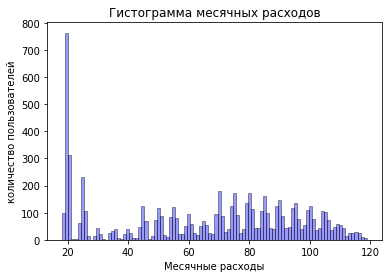

In [21]:
sns.distplot(df['MonthlyCharges'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Гистограмма месячных расходов')
plt.xlabel('Месячные расходы')
plt.ylabel('количество пользователей');

Исходя из графика мы видим что большинсвто клиентов имеют месячные траты в районе 20

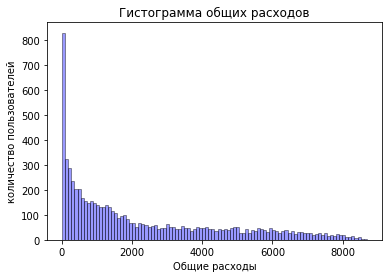

In [22]:
sns.distplot(df['TotalCharges'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Гистограмма общих расходов')
plt.xlabel('Общие расходы')
plt.ylabel('количество пользователей');

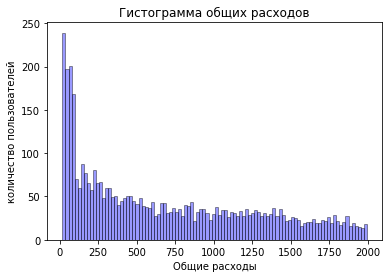

In [23]:
total = df.query('TotalCharges <2000')

sns.distplot(total['TotalCharges'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Гистограмма общих расходов')
plt.xlabel('Общие расходы')
plt.ylabel('количество пользователей');

Исходя из графиков мы видим что общие траты клиетов в большинсве служаем не превышают 250, что может значить, что у компании низкое удержание клиентов

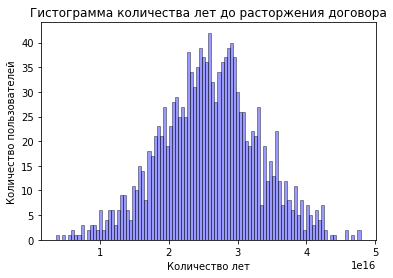

In [24]:
df['days_of_life'] = df['EndDate'] - df['BeginDate'] #Создадим новый столбец с количеством дней до отключения тарифа
time = df.query('EndDate < "2020-01-01"')

sns.distplot(time['days_of_life'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Гистограмма количества лет до расторжения договора')
plt.xlabel('Количество лет')
plt.ylabel('Количество пользователей')

df = df.drop(['days_of_life'],axis=1)

Из графика мы видим, что среди клиентов, которые расторгли договор большинсво расторгали договор в течение 2 года

In [25]:
df.phik_matrix()

interval columns not set, guessing: ['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


customerID  BeginDate   EndDate      Type  PaperlessBilling  \
customerID               1.0   1.000000  1.000000  1.000000          1.000000   
BeginDate                1.0   1.000000  0.551935  0.090777          0.021424   
EndDate                  1.0   0.551935  1.000000  0.249265          0.250830   
Type                     1.0   0.090777  0.249265  1.000000          0.106151   
PaperlessBilling         1.0   0.021424  0.250830  0.106151          1.000000   
PaymentMethod            1.0   0.082853  0.337394  0.277528          0.368945   
MonthlyCharges           1.0   0.185535  0.222158  0.388557          0.467547   
TotalCharges             1.0   0.000000  0.165315  0.507638          0.205050   
gender                   1.0   0.093096  0.000000  0.000000          0.000000   
SeniorCitizen            1.0   0.138157  0.174820  0.085800          0.241715   
Partner                  1.0   0.139852  0.190690  0.179294          0.010489   
Dependents               1.0   0.019871  0.207653  0.146126          0.170650   
InternetService          1.0   0.000000  0.160340  0.038679          0.097161   
OnlineSecurity           1.0   0.110860  0.201652  0.152239          0.000000   
OnlineBackup             1.0   0.000000  0.109793  0.099016          0.196937   
DeviceProtection         1.0   0.080758  0.075088  0.137817          0.161234   
TechSupport              1.0   0.000000  0.191568  0.180169          0.055354   
StreamingTV              1.0   0.060059  0.087093  0.067123          0.344114   
StreamingMovies          1.0   0.017452  0.078819  0.070375          0.325351   
MultipleLines            1.0   0.064637  0.066741  0.065750          0.253299   
is_leave                 1.0   0.488792  0.965257  0.251283          0.295194   

                  PaymentMethod  MonthlyCharges  TotalCharges    gender  \
customerID             1.000000        1.000000      1.000000  1.000000   
BeginDate              0.082853        0.185535      0.000000  0.093096   
EndDate                0.337394        0.222158      0.165315  0.000000   
Type                   0.277528        0.388557      0.507638  0.000000   
PaperlessBilling       0.368945        0.467547      0.205050  0.000000   
PaymentMethod          1.000000        0.398849      0.349956  0.000000   
MonthlyCharges         0.398849        1.000000      0.762904  0.005522   
TotalCharges           0.349956        0.762904      1.000000  0.000000   
gender                 0.000000        0.005522      0.000000  1.000000   
SeniorCitizen          0.291989        0.304546      0.148024  0.000000   
Partner                0.244661        0.204575      0.424655  0.000000   
Dependents             0.222859        0.182283      0.118247  0.000000   
InternetService        0.156356        0.949693      0.282645  0.000000   
OnlineSecurity         0.261704        0.550855      0.545578  0.016788   
OnlineBackup           0.282245        0.629276      0.656039  0.007277   
DeviceProtection       0.306678        0.667621      0.672211  0.000000   
TechSupport            0.270893        0.576163      0.567056  0.000000   
StreamingTV            0.377241        0.835680      0.660452  0.000000   
StreamingMovies        0.378375        0.833111      0.666068  0.000000   
MultipleLines          0.339987        0.676393      0.606423  0.000000   
is_leave               0.448559        0.359623      0.280973  0.000000   

                  SeniorCitizen  ...  Dependents  InternetService  \
customerID             1.000000  ...    1.000000         1.000000   
BeginDate              0.138157  ...    0.019871         0.000000   
EndDate                0.174820  ...    0.207653         0.160340   
Type                   0.085800  ...    0.146126         0.038679   
PaperlessBilling       0.241715  ...    0.170650         0.097161   
PaymentMethod          0.291989  ...    0.222859         0.156356   
MonthlyCharges         0.304546  ...    0.182283         0.949693   
TotalCharges           0.148024 

# Подготовка модели

In [26]:
df['EndDate'].max()

Timestamp('2020-01-01 00:00:00')

In [27]:
#Создание новых признаков и удаление ненужных
df['year'] = df['BeginDate'].dt.year
df['month'] = df['BeginDate'].dt.month
df['day'] = df['BeginDate'].dt.day
df['days_of_life'] = df['EndDate'] - df['BeginDate'] #Создадим новый столбец с количеством дней до отключения тарифа

df = df.drop('BeginDate',axis=1)
df = df.drop('EndDate',axis=1)
df = df.drop('customerID',axis=1)

In [28]:
target = df['is_leave']
features = df.drop('is_leave',axis=1)

train_features, test_features, train_target, test_target = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    shuffle=True,
    random_state=RANDOM_STATE)

train_target=train_target.astype('int')
test_target=test_target.astype('int')

In [29]:
categoric = ['Type','PaymentMethod','InternetService']
numeric = ['PaperlessBilling','MonthlyCharges','TotalCharges','gender','SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines','year','month','day']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value = -1) #Порядковое кодирование для моделей RandomForest и DecisionTree
encoder.fit(train_features[categoric]) 
train_features_cat = pd.DataFrame(encoder.transform(train_features[categoric]),columns=categoric,index=train_features.index) 
train_features_cat = train_features_cat.join(train_features[numeric])
test_features_cat = pd.DataFrame(encoder.transform(test_features[categoric]),columns=categoric,index=test_features.index)
test_features_cat = test_features_cat.join(test_features[numeric])


#Скалироание признаков
train_features_reg = train_features_cat
test_features_reg = test_features_cat

scaler = StandardScaler()
scaler.fit(train_features_reg)
train_features_reg = scaler.transform(train_features_reg)
test_features_reg = scaler.transform(test_features_reg)

In [30]:
best_depth_tree = -100
best_depth_forest = -100
best_est = -100
best_score_tree=-100
best_score_forest = -100
best_score_regression = -100
best_model_tree = None
best_model_forest = None
best_model_regression = None

# Создание моделей

In [31]:
best_model_regression = LogisticRegression(random_state=RANDOM_STATE,solver='liblinear')
scores = cross_val_score(best_model_regression,train_features_reg,train_target,cv=6, scoring='roc_auc')
best_score_regression = scores.mean()
print('Лучший результат модели регрессии',best_score_regression)

Лучший результат модели регрессии 0.8779975659779286


In [32]:
tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_params = {'max_depth': range(1,300)}
tree_grid = GridSearchCV(tree_model, tree_params, cv=6,n_jobs=-1,verbose=True,scoring='roc_auc')
tree_grid.fit(train_features_reg,train_target)
print('Лучшая модель дерева показала результат:',tree_grid.best_score_,' при глубине дерева =', tree_grid.best_params_)

Fitting 6 folds for each of 299 candidates, totalling 1794 fits
Лучшая модель дерева показала результат: 0.8529158702176183  при глубине дерева = {'max_depth': 5}


In [33]:
forest_model = RandomForestClassifier(random_state=RANDOM_STATE)
forest_params = {'max_depth': range(1,10,1), 'n_estimators': range(1,100,10)}
forest_grid = GridSearchCV(forest_model, forest_params, cv=6,n_jobs=-1,verbose=True,scoring='roc_auc')
forest_grid.fit(train_features_reg,train_target)
print('Лучшая модель леса показала результат:',forest_grid.best_score_,' при глубине дерева и количестве деревьев =',
      forest_grid.best_params_)

Fitting 6 folds for each of 90 candidates, totalling 540 fits
Лучшая модель леса показала результат: 0.8801186778004514  при глубине дерева и количестве деревьев = {'max_depth': 8, 'n_estimators': 91}


In [ ]:
cats = [0,2,9]
model_cat = CatBoostClassifier(random_seed=RANDOM_STATE,cat_features=cats,loss_function = 'Logloss')
cats_params = {'learning_rate':[0.3,0.5],'l2_leaf_reg':[3,5,7,9],'depth':[4,6,10]}
cats_grid = GridSearchCV(model_cat, cats_params, cv=6,n_jobs=-1,verbose=True,scoring='roc_auc')
cats_grid.fit(train_features,train_target)

Fitting 6 folds for each of 24 candidates, totalling 144 fits
0:	learn: 0.5135446	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.4468153	total: 71.3ms	remaining: 35.6s
2:	learn: 0.3836299	total: 76.7ms	remaining: 25.5s
3:	learn: 0.3629376	total: 81.6ms	remaining: 20.3s
4:	learn: 0.3465627	total: 86.1ms	remaining: 17.1s
5:	learn: 0.3210533	total: 90.5ms	remaining: 15s
6:	learn: 0.3145647	total: 94.6ms	remaining: 13.4s
7:	learn: 0.3129836	total: 97.5ms	remaining: 12.1s
8:	learn: 0.2973670	total: 102ms	remaining: 11.2s
9:	learn: 0.2950165	total: 106ms	remaining: 10.5s
10:	learn: 0.2822249	total: 111ms	remaining: 9.95s
11:	learn: 0.2792602	total: 114ms	remaining: 9.42s
12:	learn: 0.2760082	total: 119ms	remaining: 9s
13:	learn: 0.2592520	total: 123ms	remaining: 8.65s
14:	learn: 0.2574333	total: 127ms	remaining: 8.37s
15:	learn: 0.2492619	total: 132ms	remaining: 8.1s
16:	learn: 0.2437831	total: 135ms	remaining: 7.83s
17:	learn: 0.2429563	total: 139ms	remaining: 7.61s
18:	learn: 0.2395265	total: 

In [ ]:
print('Лучшая модель catboost показала результат:',cats_grid.best_score_,' при наилучших параметрах =',
      cats_grid.best_params_)

In [ ]:
train_features_3, valid_features_2, train_target_3, valid_target_2 = train_test_split(
    train_features_reg, 
    train_target, 
    test_size=0.2, 
    shuffle=True,
    stratify = train_target,
    random_state=RANDOM_STATE)

train_features_3 = pd.DataFrame(train_features_3)
valid_features_2 = pd.DataFrame(valid_features_2)


X_train = torch.FloatTensor(train_features_3.values)
X_test = torch.FloatTensor(valid_features_2.values)
y_train = torch.FloatTensor(train_target_3.values)
y_test = torch.FloatTensor(valid_target_2.values)


n_in_neurons = 20
n_hidden_neurons_1 = 12
n_hidden_neurons_2 = 10
n_out_neurons = 1 

net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.Tanh(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons), 
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

loss = nn.BCELoss()

num_epochs = 10

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    preds = net.forward(X_train).flatten()
    
    loss_value = loss(preds, y_train)
    
    loss_value.backward()
    
    optimizer.step()
    
    net.eval()
    test_preds = net.forward(X_test)
    test_preds = test_preds.detach().numpy()
    test_preds = [np.round(x) for x in test_preds]
    roc_auc = roc_auc_score(test_preds,y_test)
    print(roc_auc)

In [ ]:
table = [['Логистическая регрессия',round(best_score_regression,3)],['Forest model',round(forest_grid.best_score_,3)],['Tree classifier',round(tree_grid.best_score_,3)],['CatBoost',0.886],['Neural network',0.75]]
pd.DataFrame(table, columns=['Название модели', 'ROC_AUC score'])

По итогу обучения лучшей моделью оказалась модель catboost, ее будем проверять на тестовой выборке

# Проверка лучшей модели

In [ ]:
predictions = cats_grid.predict_proba(test_features)

In [ ]:
predictions = predictions[:, 1]
print("Значение ROC AUC лучшей модели на тестовой выборке составило:",roc_auc_score(test_target,predictions))

In [ ]:
prediction = cats_grid.predict(test_features)
print("Значение accuracy лучшей модели на тестовой выборке составило:",accuracy_score(prediction,test_target))

In [ ]:
test_target = test_target.astype(int)

matrix = confusion_matrix(test_target,prediction)
matrix = np.flip(matrix)
#matrix = pd.DataFrame(matrix, columns=['Positive', 'Negative'], index =['Positive', 'Negative'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure(figsize=(10, 8))
plot_confusion_matrix(matrix, classes=['Positive', 'Negative'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(test_target,predictions)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='red')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show() 

In [ ]:
model = cats_grid.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_features)

shap.summary_plot(shap_values, test_features)

Наиболее важными признаками для предсказания модели являются месячные расходы и общие доходы, при этом что интересно ВЫСОКИЕ месячные доходы и НИЗКИЕ общие доходы, а также месяц

In [ ]:
monthly_leavers = df.query('is_leave>0')['MonthlyCharges']
monthly_no_leavers = df.query('is_leave<1')['MonthlyCharges']

total_leavers = df.query('is_leave>0')['TotalCharges']
total_no_leavers = df.query('is_leave<1')['TotalCharges']

In [ ]:
print(monthly_leavers.mean())
print(monthly_no_leavers.mean())
print('-------------------------------')
print(monthly_leavers.median())
print(monthly_no_leavers.median())

In [ ]:
print(total_leavers.mean())
print(total_no_leavers.mean())
print('-------------------------------')
print(total_leavers.median())
print(total_no_leavers.median())

По средним и медианным значениям мы видим, что люди которые расторгли договор обычно тратят больше в месяц, но при этом в общем меньше, видимо так как рано расторгают договор.

# Вывод

По итогу мы составили модель, которая предсказывает расторгнет договор клиент или нет. Согласно модели наиболее важным признаком для модели являются месячные расходы, так как те кто расторгают договор обычно имеют более высокие месячные затраты, следовательно можно дать рекоммендацию предлагать людям с высокими месячными затратами различные скидки